### Binary Classfication

In [58]:
from konlpy.tag import Mecab

train_data_list =  {
                'encode' : ['판교에 오늘 피자 주문해줘','오늘 날짜에 호텔 예약 해줄레','모래 날짜에 판교 여행 정보 알려줘'],
                'decode' : ['0','1','2']
             }



embed_type = 'onehot'
encode_length = 4
vector_size = 50
label_size = 3

def inference_embed(data) : 
    mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')
    encode_raw = mecab.morphs(data)
    encode_raw = list(map(lambda x : encode_raw[x] if x < len(encode_raw) else '#', range(encode_length)))
    if(embed_type == 'onehot') :
        bucket = np.zeros(vector_size, dtype=float).copy()
        input = np.array(list(map(lambda x : np.zeros(vector_size,dtype=float) , encode_raw)))
    else : 
        input = np.array(list(map(lambda x : model[x] if x in model.wv.index2word else np.zeros(vector_size,dtype=float) , encode_raw)))
    return input

def onehot_vectorize(bucket, x):
    np.put(bucket, model.wv.index2word.index(x),1)
    return bucket

def embed(data) : 
    mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')
    inputs = []
    labels = []
    for encode_raw in data['encode'] : 
        encode_raw = mecab.morphs(encode_raw)
        encode_raw = list(map(lambda x : encode_raw[x] if x < len(encode_raw) else '#', range(encode_length)))
        if(embed_type == 'onehot') :
            bucket = np.zeros(vector_size, dtype=float).copy()
            input = np.array(list(map(lambda x : onehot_vectorize(bucket, x) if x in model.wv.index2word else np.zeros(vector_size,dtype=float) , encode_raw)))
        inputs.append(input.flatten())
        
    for decode_raw in data['decode']: 
        label = np.zeros(label_size, dtype=float)
        np.put(label, decode_raw, 1)
        labels.append(label)
    return inputs, labels

from gensim.models import word2vec

def train_vector_model(str_buf):

    mecab = Mecab('/usr/local/lib/mecab/dic/mecab-ko-dic')
    str_buf = train_data_list['encode']
    pos1 = mecab.pos(''.join(str_buf))
    pos2 = ' '.join(list(map(lambda x : '\n' if x[1] in ['SF'] else x[0], pos1))).split('\n')
    morphs = list(map(lambda x : mecab.morphs(x) , pos2))
    print(str_buf)
    model = word2vec.Word2Vec(size=vector_size, window=2, min_count=1)
    model.build_vocab(morphs)
    model.train(morphs)
    return model
model = train_vector_model(train_data_list)
# print(model)



# print(np.array(embed(train_data_list)).flatten())
print(np.array(embed(train_data_list)))
# X = np.array(embed(train_data_list))[0]
# y = np.array(embed(train_data_list))[1]
X = embed(train_data_list)[0]
y = embed(train_data_list)[1]
print(X[0])

['판교에 오늘 피자 주문해줘', '오늘 날짜에 호텔 예약 해줄레', '모래 날짜에 판교 여행 정보 알려줘']
[[ array([ 1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,

In [59]:
import numpy as np
# X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
#y = np.array([1, 2, 2, 2])
y = np.array([1, 2, 3])

from sklearn.svm import SVC
clf = SVC()
clf.fit(X, y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
# print(clf.predict([[2, 2]]))
print(clf.predict(X[2]))

[3]


/opt/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


### Multi-class classification

In [54]:
from sklearn import svm

X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y) 
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
dec = clf.decision_function([[1]])
print(dec.shape[1]) # 4 classes: 4*3/2 = 6
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
print(dec.shape[1]) # 4 classes


6
4


Automatically created module for IPython interactive environment


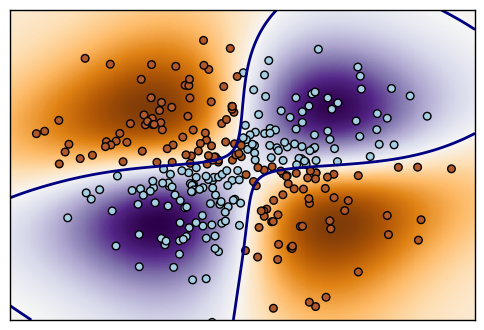

In [55]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

# fit the model
clf = svm.NuSVC()
clf.fit(X, Y)

# plot the decision function for each datapoint on the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linetypes='--')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()

Automatically created module for IPython interactive environment


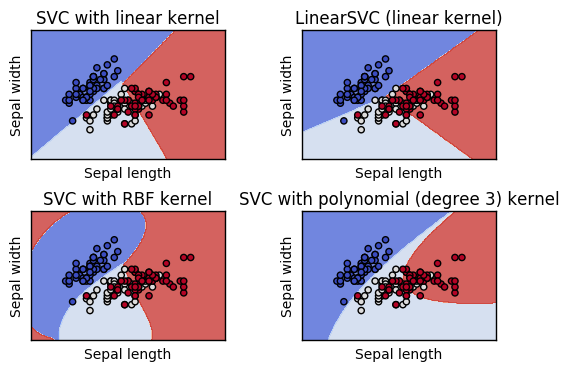

In [56]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()